In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
!pip install xgboost

In [4]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('/kaggle/input/oil-reserve-in-mm-stb/OIL RESERVE IN MM STB.csv')

In [7]:
df.head()

,A,h,phi,Swi,Rf,Bo,Np(In MM STB)
0,52,35,0.105517,0.433784,0.751064,80,0.007920
1,93,75,0.243215,0.039028,0.849330,3,3.580554
2,15,87,0.779881,0.063515,0.773912,89,0.064297
3,72,30,0.463686,0.191548,0.127838,76,0.010566
4,61,48,0.457068,0.718298,0.759110,98,0.022655


In [8]:
X=df.iloc[:,:6]
Y=df.iloc[:,6]

In [9]:
validation_size =0.20
randomseed=7
xtrain,xval,ytrain,yval=train_test_split(X,Y,test_size=validation_size,random_state=randomseed)


In [10]:
min_sample_split_list = [ 2,10,30,50,100,200,300,600]
max_depth_list = [2,4,8,16,32,84,None]
n_estimators_list = [10,50,100,500]

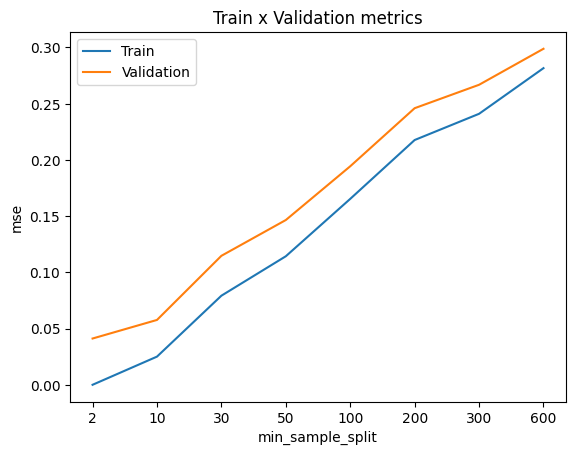

In [12]:
mse_list_train = []
mse_list_val = []

for min_sample_split in min_sample_split_list:
    model = ExtraTreesRegressor(min_samples_split = min_sample_split , random_state = 55).fit(xtrain,ytrain)
    predictions_train = model.predict(xtrain)
    predictions_val = model.predict(xval)
    mse_train = mean_squared_error(ytrain, predictions_train)
    mse_val = mean_squared_error(yval, predictions_val)
    mse_list_train.append(mse_train)
    mse_list_val.append(mse_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_sample_split')
plt.ylabel('mse')
plt.xticks(ticks = range(len(min_sample_split_list )),labels=min_sample_split_list) 
plt.plot(mse_list_train)
plt.plot(mse_list_val)
plt.legend(['Train','Validation'])

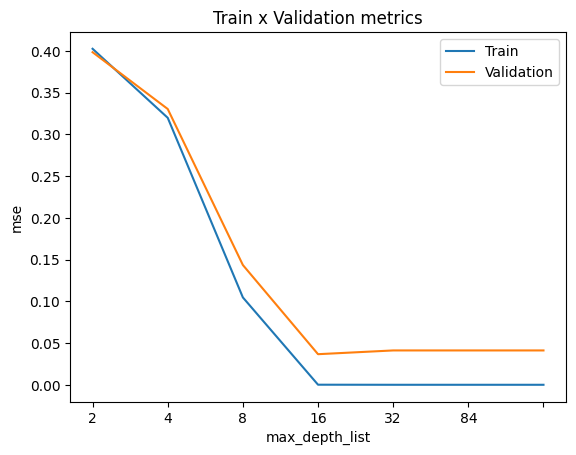

In [13]:
mse_list_train = []
mse_list_val = []

for max_depth in max_depth_list:
    model = ExtraTreesRegressor(max_depth = max_depth, random_state = 55).fit(xtrain,ytrain)
    predictions_train = model.predict(xtrain)
    predictions_val = model.predict(xval)
    mse_train = mean_squared_error(ytrain, predictions_train)
    mse_val = mean_squared_error(yval, predictions_val)
    mse_list_train.append(mse_train)
    mse_list_val.append(mse_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth_list')
plt.ylabel('mse')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list) 
plt.plot(mse_list_train)
plt.plot(mse_list_val)
plt.legend(['Train','Validation'])

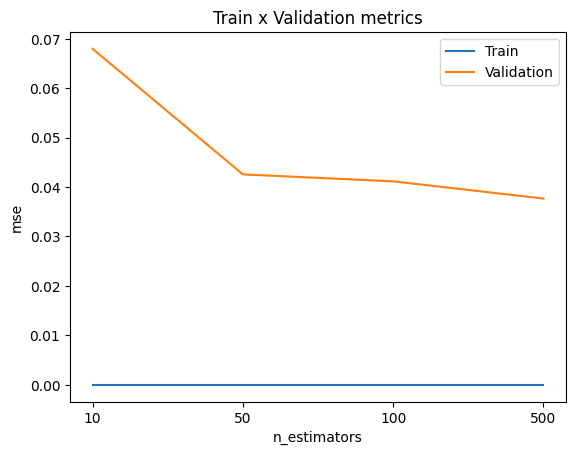

In [14]:
mse_list_train = []
mse_list_val = []

for n_estimators in n_estimators_list:
    model = ExtraTreesRegressor(n_estimators = n_estimators, random_state = 55).fit(xtrain,ytrain)
    predictions_train = model.predict(xtrain)
    predictions_val = model.predict(xval)
    mse_train = mean_squared_error(ytrain, predictions_train)
    mse_val = mean_squared_error(yval, predictions_val)
    mse_list_train.append(mse_train)
    mse_list_val.append(mse_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('mse')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list) 
plt.plot(mse_list_train)
plt.plot(mse_list_val)
plt.legend(['Train','Validation'])

In [15]:
ExtraTrees_model = ExtraTreesRegressor(n_estimators =500 ,
                                             max_depth =3 , 
                                             min_samples_split =600 ).fit(xtrain,ytrain)

In [17]:
print(f"Metrics train:\n\tMSE score: {mean_squared_error(ExtraTrees_model.predict(xtrain),ytrain):.4f}\nMetrics test:\n\tMSE score: {mean_squared_error(ExtraTrees_model.predict(xval),yval):.4f}")

Metrics train:
	MSE score: 0.3640
Metrics test:
	MSE score: 0.3666


In [18]:
y_mean = np.mean(ytrain)  # Mean of the training targets
baseline_predictions = np.full_like(ytrain, y_mean)  # Array of mean values with the same shape as y_train
baseline_mse = mean_squared_error(ytrain, baseline_predictions)
print("Baseline MSE:", baseline_mse)


Baseline MSE: 0.45539683378213786


In [31]:
if (mean_squared_error(ExtraTrees_model.predict(xtrain), ytrain) < baseline_mse and 
    mean_squared_error(ExtraTrees_model.predict(xval), yval) < baseline_mse):
    print("MODEL WORKS GREAT")
else:
    print("MODEL IS NOT GREAT")




MODEL WORKS GREAT


In [33]:
std_y_train = np.std(ytrain)
print("STD.Deviation of Y:", std_y_train)
std_y_val = np.std(yval)
print("STD.Deviation of Yval:", std_y_val)

STD.Deviation of Y: 0.6748309668221649
STD.Deviation of Yval: 0.667074525137335


In [29]:
print(f"Metrics train:\n\tRMSE score: {np.sqrt(mean_squared_error(ExtraTrees_model.predict(xtrain),ytrain)):.4f}\nMetrics test:\n\tRMSE score: {np.sqrt(mean_squared_error(ExtraTrees_model.predict(xval),yval)):.4f}")

Metrics train:
	RMSE score: 0.6033
Metrics test:
	RMSE score: 0.6055


In [32]:
if (np.sqrt(mean_squared_error(ExtraTrees_model.predict(xtrain),ytrain)) < std_y_train 
    ):
    print("MODEL WORKS GREAT")
else:
    print("MODEL IS NOT GREAT")

MODEL WORKS GREAT


In [19]:
n = int(len(xtrain)*0.8)
print(n)

32000


In [20]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = xtrain[:n], xtrain[n:], ytrain[:n], ytrain[n:]

In [26]:
xgb_model = XGBRegressor(n_estimators = 500, learning_rate = 0.09,verbosity = 1, random_state = 55)
xgb_model.fit(X_train_fit,y_train_fit,eval_metric="rmse", eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 10)

[0]	validation_0-rmse:0.65703
[1]	validation_0-rmse:0.63363
[2]	validation_0-rmse:0.61486
[3]	validation_0-rmse:0.59568
[4]	validation_0-rmse:0.56677
[5]	validation_0-rmse:0.54995
[6]	validation_0-rmse:0.52777
[7]	validation_0-rmse:0.51509
[8]	validation_0-rmse:0.49632
[9]	validation_0-rmse:0.48260
[10]	validation_0-rmse:0.47024
[11]	validation_0-rmse:0.45745
[12]	validation_0-rmse:0.43920
[13]	validation_0-rmse:0.42978
[14]	validation_0-rmse:0.42148
[15]	validation_0-rmse:0.41351
[16]	validation_0-rmse:0.40605
[17]	validation_0-rmse:0.39963
[18]	validation_0-rmse:0.39214
[19]	validation_0-rmse:0.38587
[20]	validation_0-rmse:0.38164
[21]	validation_0-rmse:0.37459
[22]	validation_0-rmse:0.36946
[23]	validation_0-rmse:0.36517
[24]	validation_0-rmse:0.36246
[25]	validation_0-rmse:0.35794
[26]	validation_0-rmse:0.35540
[27]	validation_0-rmse:0.35206
[28]	validation_0-rmse:0.34917
[29]	validation_0-rmse:0.34625
[30]	validation_0-rmse:0.34293
[31]	validation_0-rmse:0.34040
[32]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.33351
[36]	validation_0-rmse:0.33269
[37]	validation_0-rmse:0.33216
[38]	validation_0-rmse:0.33019
[39]	validation_0-rmse:0.32892
[40]	validation_0-rmse:0.32673
[41]	validation_0-rmse:0.32483
[42]	validation_0-rmse:0.32338
[43]	validation_0-rmse:0.32249
[44]	validation_0-rmse:0.32176
[45]	validation_0-rmse:0.31943
[46]	validation_0-rmse:0.31823
[47]	validation_0-rmse:0.31712
[48]	validation_0-rmse:0.31675
[49]	validation_0-rmse:0.31420
[50]	validation_0-rmse:0.31343
[51]	validation_0-rmse:0.31289
[52]	validation_0-rmse:0.31245
[53]	validation_0-rmse:0.31212
[54]	validation_0-rmse:0.31100
[55]	validation_0-rmse:0.30956
[56]	validation_0-rmse:0.30927
[57]	validation_0-rmse:0.30893
[58]	validation_0-rmse:0.30800
[59]	validation_0-rmse:0.30650
[60]	validation_0-rmse:0.30507
[61]	validation_0-rmse:0.30416
[62]	validation_0-rmse:0.30390
[63]	validation_0-rmse:0.30396
[64]	validation_0-rmse:0.30327
[65]	validation_0-rmse:0.30251
[66]	validation_0-rmse:0.30240
[67]	val

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=55, ...)

In [27]:
xgb_model.best_iteration

274

In [23]:
print(f"Metrics train:\n\tMSE score: {mean_squared_error(xgb_model.predict(xtrain),ytrain):.4f}\nMetrics test:\n\tMSE score: {mean_squared_error(xgb_model.predict(xval),yval):.4f}")

Metrics train:
	MSE score: 0.0156
Metrics test:
	MSE score: 0.0885
